### Trabalho 1 - Ciência de Dados

In [8]:
import pandas as pd

# opening csv file
df = pd.read_csv('2006-sample.csv')

1. Descobrir a quantiade de atrasos de uma dada companhia passada como parâmetro. 

In [18]:
# gathering all unique carrier codes
valueCarrierCounts = df['UniqueCarrier'].value_counts()

# obtains the valueCarrierCounts index 
indexList = valueCarrierCounts.index.tolist()

# converts the index to a string
indexString = ", ".join(indexList)

# filtered dataframe with delays in at least one column 
dfDelay = df[(df['ArrDelay'] > 0) | (df['DepDelay'] > 0)]

# prints the message with carrier list
print(f"Códigos das companhias aéreas: {indexString}")

# reads user input
inputIndex = input("Digite o código da companhia aérea para descobrir sua quantidade de atrasos: ")

# number of delays of each carrier
carrierValues = dfDelay['UniqueCarrier'].value_counts()

# checks input value and returns the result
carrierDelays = carrierValues.get(inputIndex, "Companhia não encontrada")

print(f"Número de atrasos da companhia {inputIndex}: {carrierDelays}")


Códigos das companhias aéreas: WN, AA, MQ, OO, US, DL, UA, NW, XE, YV, CO, EV, OH, FL, AS, B6, F9, HA, AQ, TZ


Digite o código da companhia aérea para descobrir sua quantidade de atrasos:  AA


Número de atrasos da companhia AA: 3355


2. Descobrir o vôo com maior atraso na chegada (`ArrDelay`) registrado.

In [10]:
#sorting `ArrDelay` by descending value
sortedDf = df.sort_values(by = 'ArrDelay', ascending = False)

#removing NaN values from the column
sortedDf = sortedDf.dropna(subset=['ArrDelay'])

#selecting ArrDelay e flightNum columns
separatedDf = sortedDf[['ArrDelay', 'FlightNum']]

#removing early flights
separatedDfArr = separatedDf[separatedDf['ArrDelay'] > 0]

#getting the most delayed flight info
flightNumber = separatedDfArr.iloc[0,1]
minutesDelay = separatedDfArr.iloc[0,0]

print(f"O vôo com maior atraso na chegada foi o de número {flightNumber}, com {minutesDelay} minutos")

O vôo com maior atraso na chegada foi o de número 740, com 822.0 minutos


3. Descobrir o vôo com maior atraso na saída (`DepDelay`) registrado.

In [11]:
#sorting `DepDelay` by descending value
sortedDf = df.sort_values(by = 'DepDelay', ascending = False)

#removing NaN values from the column
sortedDf = sortedDf.dropna(subset=['DepDelay'])

#selecting DepDelay e flightNum columns
separatedDfDep = sortedDf[['DepDelay', 'FlightNum']]

#getting the most delayed flight info
flightNumber = separatedDfDep.iloc[0,1]
minutesDelay = separatedDfDep.iloc[0,0]

print(f"O vôo com maior atraso na saída foi o de número {flightNumber}, com {minutesDelay} minutos")

O vôo com maior atraso na saída foi o de número 740, com 792.0 minutos


4. Descobrir o vôo mais longo.

In [12]:
#sorting `AirTime` by descending value
sortedDf = df.sort_values(by = 'AirTime', ascending = False)

#removing NaN values from the column
sortedDf = sortedDf.dropna(subset=['AirTime'])

#selecting DepDelay e flightNum columns
separatedDfAir = sortedDf[['AirTime', 'FlightNum']]

#getting the most delayed flight info
flightNumber = separatedDfAir.iloc[0,1]
airTime = separatedDfAir.iloc[0,0]


print(f"O voo mais longo foi o de número {flightNumber}, que durou {airTime} minutos")

O voo mais longo foi o de número 116, que durou 1584.0 minutos


5. Contar quantos vôos precisaram ser redirecionados (`Diverted`).

In [13]:
import pandas as pd

#opening csv file
df = pd.read_csv('2006-sample.csv')

#removing NaN values from the column
df = df.dropna(subset=['Diverted'])

#counts diverted flights
divertedCount = df['Diverted'].sum()

#count non-diverted flights
nonDivertedCount = len(df) - divertedCount

print(f"{divertedCount} voos precisaram ser redirecionados")

133 voos precisaram ser redirecionados


6. Calcular o tempo de atraso total para a companhia `Delta Air Lines`
   

In [26]:
import pandas as pd

#reading csv file
df = pd.read_csv('2006-sample.csv')

#filtering the column that have the DL code
filteredCodes = df[df['UniqueCarrier'] == 'DL']

#removing NaN values
filteredDepCodes = filteredCodes.dropna(subset = ['DepDelay'])
filteredArrCodes = filteredCodes.dropna(subset = ['ArrDelay'])

#removing early flights
filteredDep = filteredDepCodes[filteredDepCodes['DepDelay'] > 0]
filteredArr = filteredArrCodes[filteredArrCodes['ArrDelay'] > 0]


#copying the columns into a new dataframe
dfDep = filteredDep[['DepDelay']].copy()
dfArr = filteredArr[['ArrDelay']].copy()

#renaming the dataframe columns
dfDep = dfDep.rename(columns={'DepDelay': 'Delay'})
dfArr = dfArr.rename(columns={'ArrDelay': 'Delay'})

#combining both DataFrames into one datarame with a single column
dfCombined = pd.concat([dfDep, dfArr], axis=0, ignore_index=True)

#saving the column into csv format, so it is possible to run the paste -sd+ infile.csv | bc command
dfCombined.to_csv('infile.csv', index=False, header=False)

In [1]:
!paste -sd+ infile.csv | bc

116185.0


7. Mostrar o tempo total de atrasos para a decolagem de vôos no aeroporto `JFK`, de Nova Iorque.

In [38]:
import pandas as pd

df = pd.read_csv('2006-sample.csv')

#filtering JFK as the origin 
dfJfk = df[df['Origin'] == 'JFK']

#removing early flights
filteredDfDelay = dfJfk[dfJfk['DepDelay'] > 0]
filteredDfEarly = dfJfk[dfJfk['DepDelay'] < 0]

#calculating the total delay time 
delaySum = filteredDfDelay['DepDelay'].sum()
earlySum = filteredDfEarly['DepDelay'].sum()

print(f"O tempo total de atraso na decolagem dos voos no aeroporto JFK é de {delaySum} minutos.")

O tempo total de atraso na decolagem dos voos no aeroporto JFK é de 16065.0 minutos.


### Gráficos

#### 1

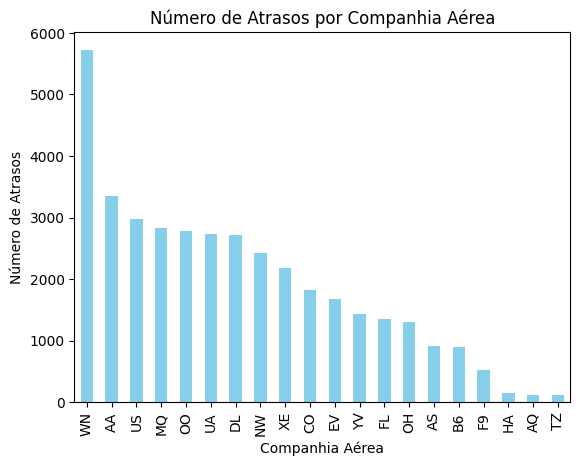

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# ploting bar graphic
carrierValues.plot(kind='bar', color='skyblue')
plt.title('Número de Atrasos por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Número de Atrasos')
plt.show()


##### Existe uma grande disparidade entre o número de atrasos entre os extremos do gráfico. Até mesmo entre as duas companhias com maior número de atrasos é possível perceber uma grande diferença nas quantidades. Isso pode nos dar algumas hipóteses, como a de que a companhia WN realiza muito mais voos que as outras e, por isso, faz sentido que haja mais atrasos, uma vez que o número de viagens é muito maior. Outra hipótese é a de que atrasos nos voos é um problema recorrente na empresa WN, o que é algo ruim para os clientes.

#### 2 e 3

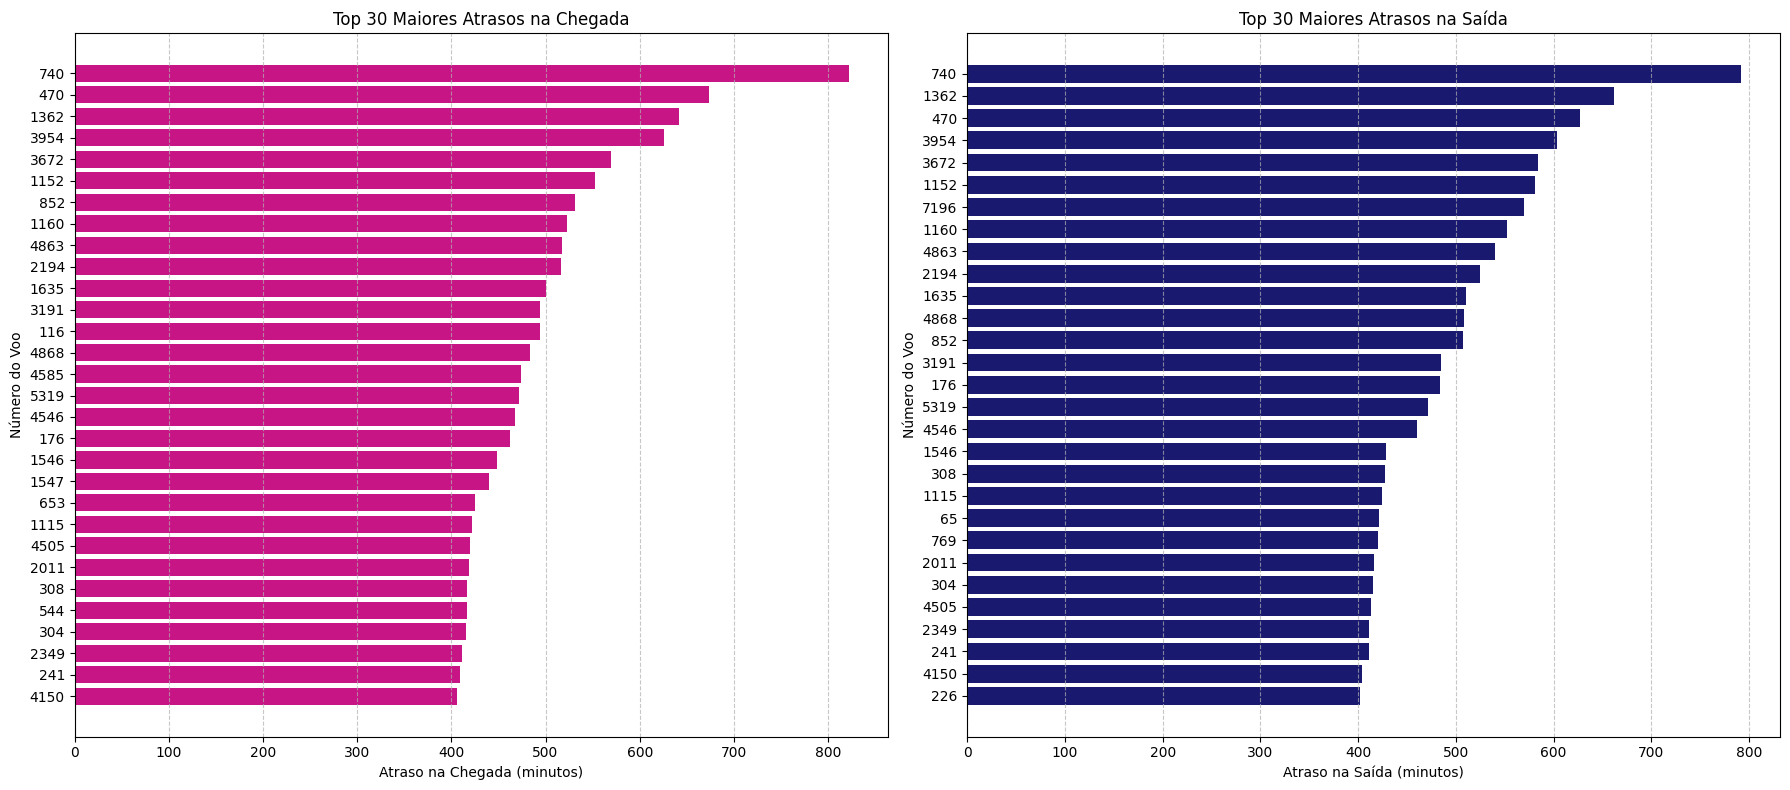

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

#select the top 30 delays in arrival
top30DelaysArr = separatedDfArr.sort_values(by='ArrDelay', ascending=False).head(30)

#select the top 30 delays in departure
top30DelaysDep = separatedDfDep.sort_values(by='DepDelay', ascending=False).head(30)

#create the figure and axes for two side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

#plot 1 - Top 30 delays in arrival
ax1.barh(top30DelaysArr['FlightNum'].astype(str), top30DelaysArr['ArrDelay'], color='mediumvioletred')
ax1.set_xlabel('Atraso na Chegada (minutos)')
ax1.set_ylabel('Número do Voo')
ax1.set_title('Top 30 Maiores Atrasos na Chegada')
ax1.invert_yaxis()  
ax1.grid(axis='x', linestyle='--', alpha=0.7)

#plot 2 - Top 30 delays in departure
ax2.barh(top30DelaysDep['FlightNum'].astype(str), top30DelaysDep['DepDelay'], color='midnightblue')
ax2.set_xlabel('Atraso na Saída (minutos)')
ax2.set_ylabel('Número do Voo')
ax2.set_title('Top 30 Maiores Atrasos na Saída')
ax2.invert_yaxis()  
ax2.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


##### Ao compararmos os dois gráficos de atraso nas chegadas e saídas, é possível observar que a ordem é muito parecida em ambos, e que o tempo de atraso também é semelhante. Sendo assim, pode-se concluir e estimar o tempo de atraso da chegada de uma aeronave a partir de seu tempo de atraso na saída. 

#### 4

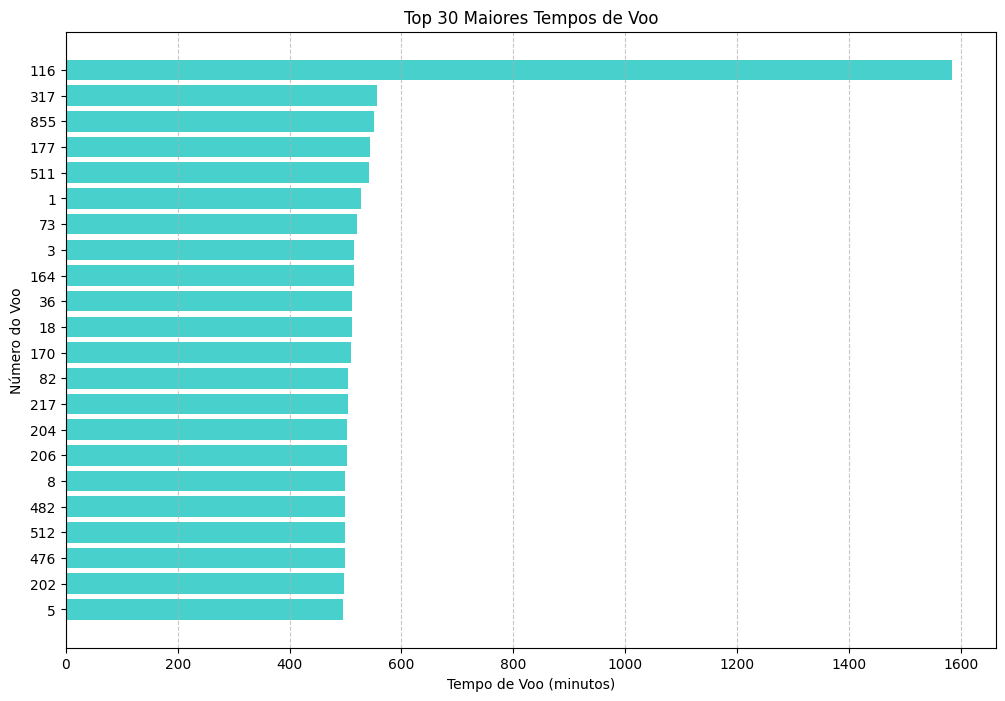

In [39]:
#select the top 30 flights with the longest air time
top30AirTime = separatedDfAir.head(30)

#plot the chart of the top 30 flights with the longest air time
plt.figure(figsize=(12, 8))
plt.barh(top30AirTime['FlightNum'].astype(str), top30AirTime['AirTime'], color='mediumturquoise')
plt.xlabel('Tempo de Voo (minutos)')
plt.ylabel('Número do Voo')
plt.title('Top 30 Maiores Tempos de Voo')
plt.gca().invert_yaxis()  # To display the flight with the longest air time on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

##### O gráfico acima mostra os 30 maiores tempos de voo de nosso dataframe. É interessante pontuar a grande diferença entre o voo mais demorado e os demais, que possuem centenas de minutos de diferença, representando um caso extremamente atípico entre milhares de voos registrados

#### 5

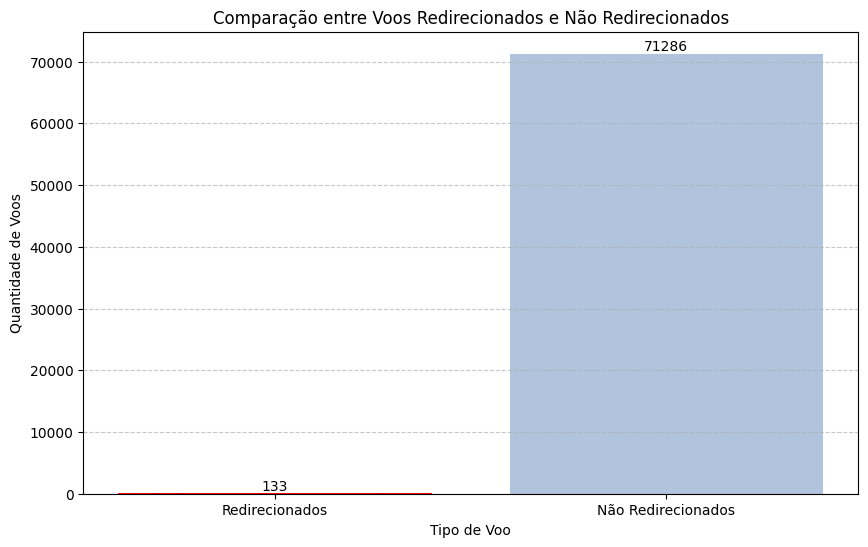

In [35]:
plt.figure(figsize=(10, 6))
bars = plt.bar(['Redirecionados', 'Não Redirecionados'], [divertedCount, nonDivertedCount], color=['red', 'lightsteelblue'])
plt.xlabel('Tipo de Voo')
plt.ylabel('Quantidade de Voos')
plt.title('Comparação entre Voos Redirecionados e Não Redirecionados')

#adds labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### No gráfico de redirecionamento de voos, fica evidenciado que esse tipo de ocorrência durante um voo é relativamente raro, acontecendo uma vez a cada 536, aproximadamente.

#### 6

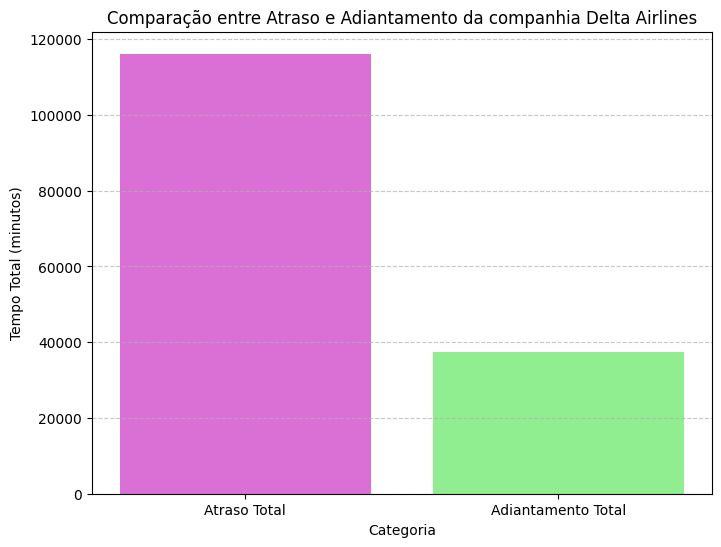

In [37]:
totalDelay = 116185.0

#sum of all early flights
earlyDep = filteredDepCodes[filteredDepCodes['DepDelay'] < 0]
earlyArr = filteredArrCodes[filteredArrCodes['ArrDelay'] < 0]

earlyDSum = earlyDep['DepDelay'].sum()
earlyASum = earlyArr['ArrDelay'].sum()

totalEarly = earlyDSum + earlyASum
#absolute value of totalEarly

totalEarly = abs(totalEarly)

plt.figure(figsize=(8, 6))
plt.bar(['Atraso Total', 'Adiantamento Total'], [totalDelay, totalEarly], color=['orchid', 'lightgreen'])
plt.xlabel('Categoria')
plt.ylabel('Tempo Total (minutos)')
plt.title('Comparação entre Atraso e Adiantamento da companhia Delta Airlines')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### No gráfico podemos observar que o número de voos atrasados é praticamente três vezes maior do que o de voos adiantados. Isso pode ser explicado por alguns fatores, sendo o principal deles o fato de que, durante um voo, existem inúmeras variáveis difíceis de serem organizadas antes que um voo parta do seu local de origem, e por isso é muito mais provável que um voo atrase do que saia adiantado. No entanto, não sabemos se essa relação entre voos atrasados e adiantados é semelhante em companhias que não sejam a Delta Airlines, pois com essas informações poderiamos tirar mais conclusões.

#### 7

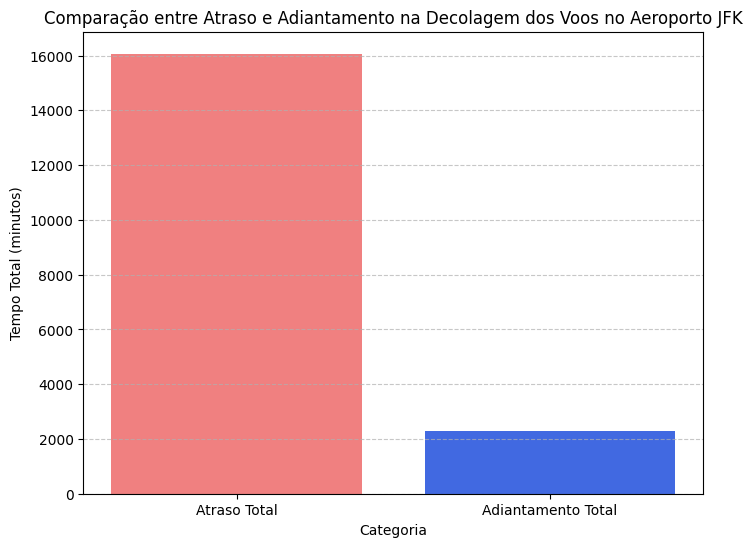

In [34]:
#absolute value of earlySum
earlySum = abs(earlySum)


plt.figure(figsize=(8, 6))
plt.bar(['Atraso Total', 'Adiantamento Total'], [delaySum, earlySum], color=['lightcoral', 'royalblue'])
plt.xlabel('Categoria')
plt.ylabel('Tempo Total (minutos)')
plt.title('Comparação entre Atraso e Adiantamento na Decolagem dos Voos no Aeroporto JFK')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Nesse gráfico a diferença entre tempos de atraso e adiantamento é ainda maior. Sendo assim, é provavel que as razões para isso sejam iguais ou muito parecidas com as do gráfico anterior.